<a href="https://colab.research.google.com/github/Athira-codes/python-projects/blob/main/FOOD_ITEM(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import os
import random
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from sklearn.metrics import classification_report,confusion_matrix


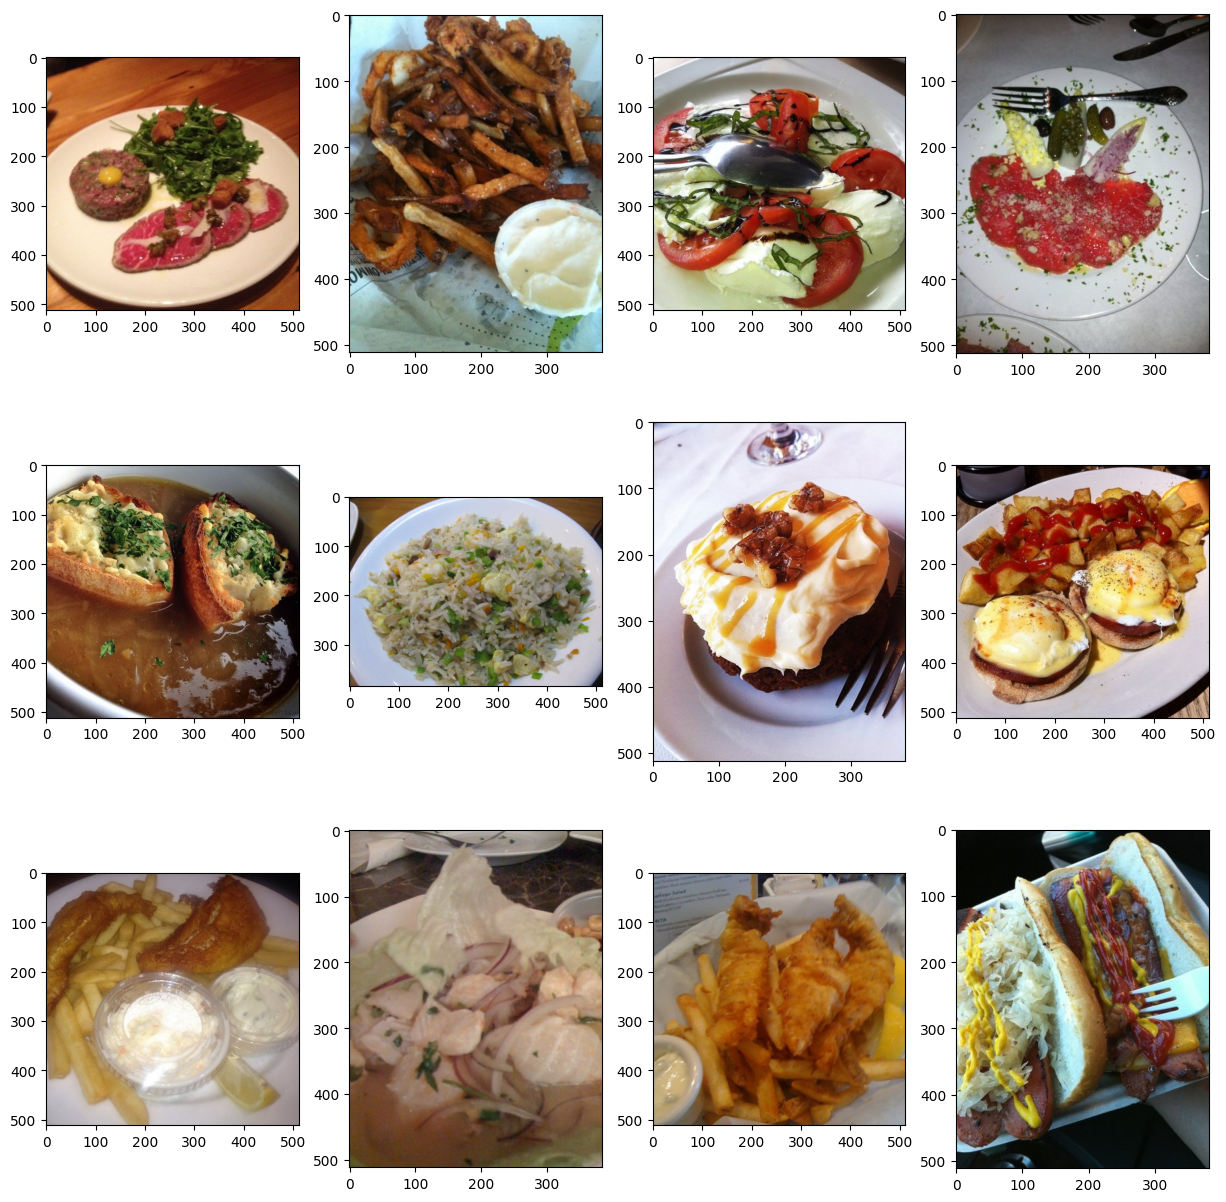

In [2]:
plt.figure(figsize=(15, 15))
food_images = '/content/drive/MyDrive/food item/training/food'
for i in range(12):
    file = random.choice(os.listdir(food_images))
    food_image_path = os.path.join(food_images, file)
    img =imread(food_image_path)
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(img)
plt.show()


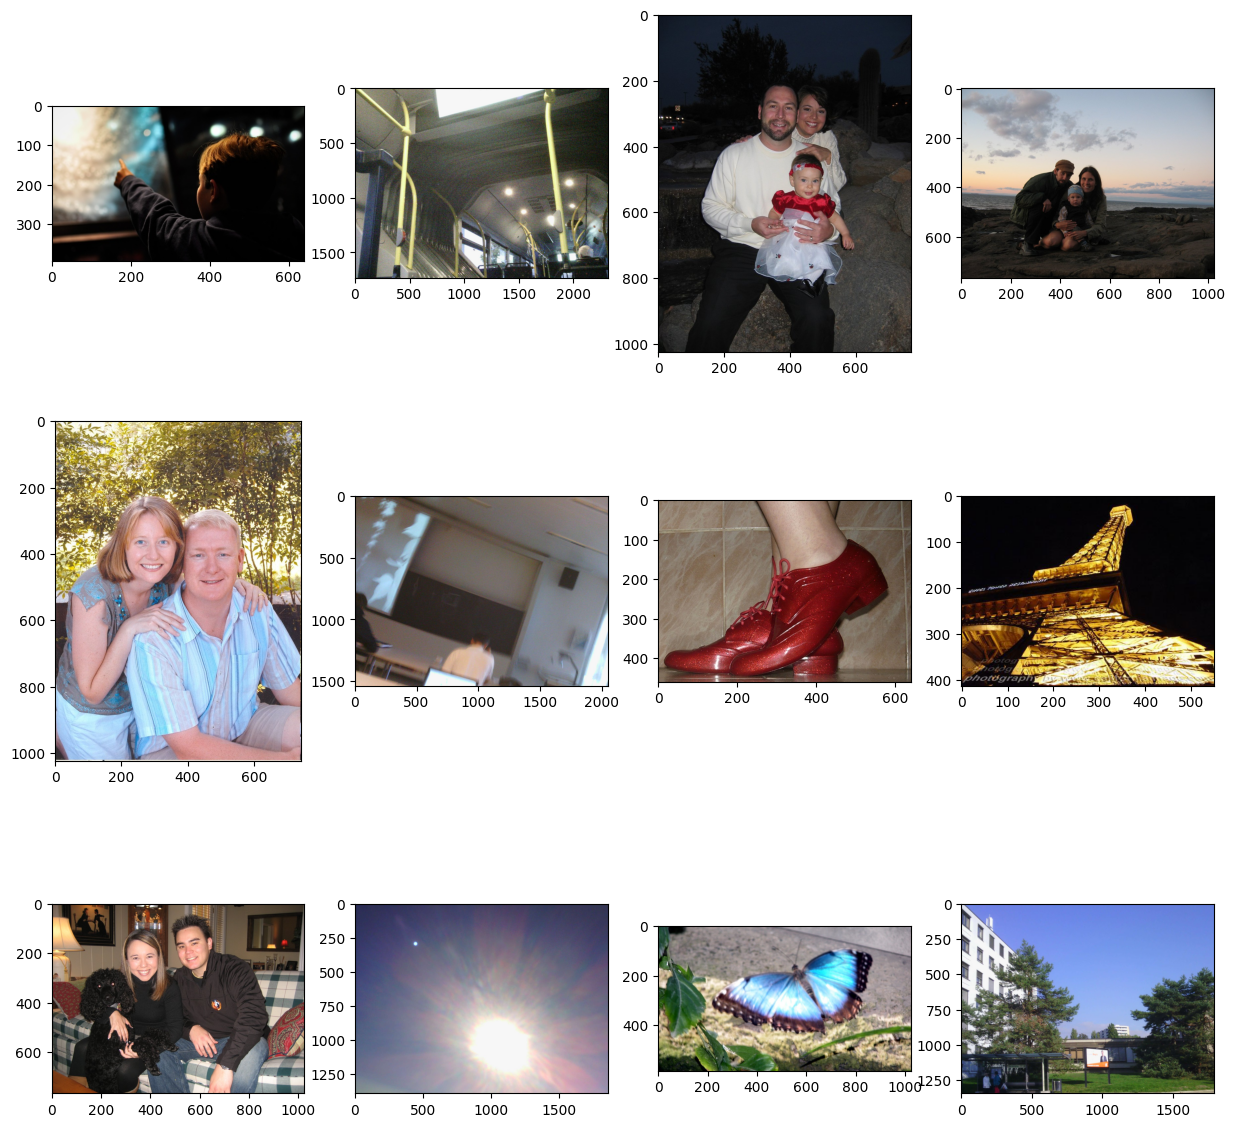

In [3]:
plt.figure(figsize=(15, 15))
non_food_images = '/content/drive/MyDrive/food item/test/non_food'
for i in range(12):
    file = random.choice(os.listdir(non_food_images))
    food_image_path = os.path.join(non_food_images, file)
    img =imread(food_image_path)
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(img)
plt.show()


In [4]:
os.listdir('/content/drive/MyDrive/food item/training')

['food', 'non_food']

In [5]:
os.listdir('/content/drive/MyDrive/food item/test')

['non_food', 'food']

In [6]:
datadir='/content/drive/MyDrive/food item/training'

In [7]:
X_train=[]
y_train=[]
categories=['food', 'non_food']
for i in categories:
  path=os.path.join(datadir,i)
  images=os.listdir(path)
  for image in images:
    img_path=os.path.join(path,image)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(150,150,3))
    X_train.append(img_resized)
    y_train.append(categories.index(i))
  print("compleated....",i)


compleated.... food
compleated.... non_food


In [8]:
datadir='/content/drive/MyDrive/food item/test'

In [9]:
X_test=[]
y_test=[]
categories=['food', 'non_food']
for i in categories:
  path=os.path.join(datadir,i)
  images=os.listdir(path)
  for image in images:
    img_path=os.path.join(path,image)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(150,150,3))
    X_test.append(img_resized)
    y_test.append(categories.index(i))
  print("compleated...",i)



compleated... food
compleated... non_food


In [10]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=20,batch_size=20)

Epoch 1/20
150/150 [==============================] - 6s 11ms/step - loss: 0.5576 - accuracy: 0.7477
Epoch 2/20
150/150 [==============================] - 2s 11ms/step - loss: 0.3528 - accuracy: 0.8573
Epoch 3/20
150/150 [==============================] - 2s 11ms/step - loss: 0.2444 - accuracy: 0.9027
Epoch 4/20
150/150 [==============================] - 2s 12ms/step - loss: 0.1654 - accuracy: 0.9317
Epoch 5/20
150/150 [==============================] - 2s 12ms/step - loss: 0.1055 - accuracy: 0.9617
Epoch 6/20
150/150 [==============================] - 2s 11ms/step - loss: 0.0562 - accuracy: 0.9833
Epoch 7/20
150/150 [==============================] - 2s 11ms/step - loss: 0.0408 - accuracy: 0.9883
Epoch 8/20
150/150 [==============================] - 2s 11ms/step - loss: 0.0400 - accuracy: 0.9887
Epoch 9/20
150/150 [==============================] - 2s 11ms/step - loss: 0.0301 - accuracy: 0.9920
Epoch 10/20
150/150 [==============================] - 2s 11ms/step - loss: 0.0122 - accura

In [14]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 1s 14ms/step - loss: 0.9200 - accuracy: 0.8750


[0.9200088381767273, 0.875]

In [15]:
model.save('modelfood.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


array([[[  5,   3,   4],
        [  6,   4,   5],
        [  7,   5,   6],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  6,   4,   5],
        [  6,   4,   5],
        [  7,   5,   6],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  7,   5,   6],
        [  7,   5,   6],
        [  7,   5,   6],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[107,  82,  60],
        [106,  81,  59],
        [105,  80,  58],
        ...,
        [ 90,  63,  33],
        [ 90,  63,  33],
        [ 90,  63,  33]],

       [[107,  82,  60],
        [107,  82,  60],
        [106,  81,  59],
        ...,
        [ 92,  66,  33],
        [ 91,  65,  32],
        [ 90,  64,  31]],

       [[110,  85,  63],
        [109,  84,  62],
        [107,  82,  60],
        ...,
        [ 95,  69,  36],
        [ 93,  67,  34],
        [ 92,  66,  33]]], dtype=uint8)
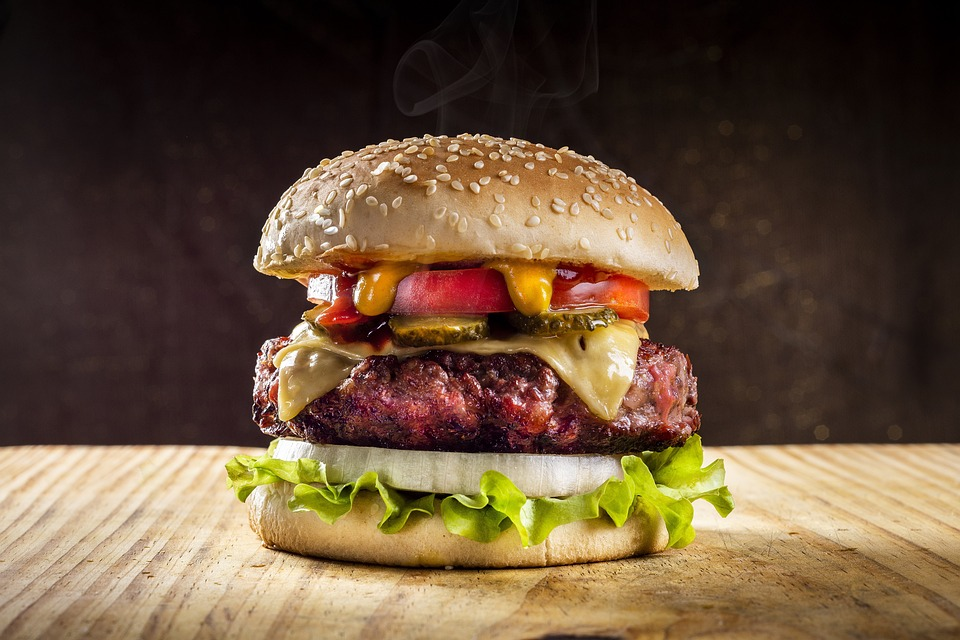

In [16]:
img=imread('/content/drive/MyDrive/burger.jpg')
img

In [17]:
img=resize(img,(150,150,3))
img.shape

(150, 150, 3)

In [18]:
img=img.reshape(1,150,150,3)
img.shape

(1, 150, 150, 3)

In [19]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 228ms/step


array([[0.9981431 , 0.00185695]], dtype=float32)

In [20]:
ind=pred.argmax(axis=1)
ind

array([0])

In [21]:
categories[ind.item()]

'food'

array([[[145, 211, 223],
        [145, 211, 223],
        [146, 212, 224],
        ...,
        [126, 202, 216],
        [125, 201, 215],
        [125, 201, 215]],

       [[145, 211, 223],
        [146, 212, 224],
        [146, 212, 224],
        ...,
        [126, 202, 216],
        [125, 201, 215],
        [125, 201, 215]],

       [[146, 212, 224],
        [146, 212, 224],
        [148, 212, 224],
        ...,
        [126, 202, 216],
        [125, 201, 215],
        [125, 201, 215]],

       ...,

       [[134, 208, 221],
        [134, 208, 221],
        [135, 209, 222],
        ...,
        [126, 202, 216],
        [126, 202, 216],
        [125, 201, 215]],

       [[134, 208, 221],
        [134, 208, 221],
        [134, 208, 221],
        ...,
        [124, 202, 215],
        [124, 202, 215],
        [123, 201, 214]],

       [[134, 208, 221],
        [134, 208, 221],
        [134, 208, 221],
        ...,
        [123, 201, 214],
        [123, 201, 214],
        [122, 200, 213]]], dtype=uint8)
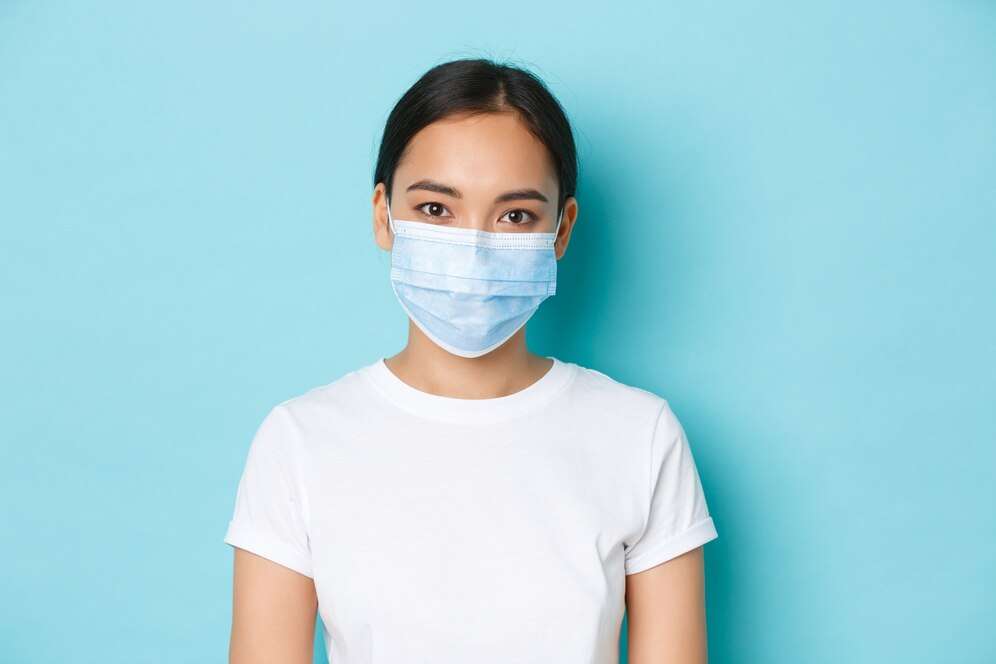

In [22]:
img1=imread('/content/drive/MyDrive/maskeddd.jpg')
img1

In [23]:
img1=resize(img1,(150,150,3))
img1=img1.reshape(1,150,150,3)
pred=model.predict(img1)
ind=pred.argmax(axis=1)
categories[ind.item()]

1/1 [==============================] - 0s 17ms/step


'non_food'